In [1]:
#Description: This program classifies patients as having chronic kidney disease (ckd) or not.
#             Using Artificial Neural Networks

#Resources: (1) Data set information : https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease
#           (2) Kaggle : https://www.kaggle.com/vijaygill/chronic-kidney-disease-prediction-using-keras/data

'''
Data Set Information:

age	-	age	
bp	-	blood pressure 
sg	-	specific gravity 
al	- albumin 
su	-	sugar 
rbc	-	red blood cells 
pc	-	pus cell 
pcc	-	pus cell clumps 
ba	-	bacteria 
bgr	-	blood glucose random 
bu	-	blood urea 
sc	-	serum creatinine 
sod	-	sodium 
pot	-	potassium 
hemo	-	hemoglobin 
pcv	-	packed cell volume 
wc	-	white blood cell count 
rc	-	red blood cell count 
htn	-	hypertension 
dm	-	diabetes mellitus 
cad	-	coronary artery disease 
appet	-	appetite 
pe	-	pedal edema 
ane	-	anemia 
class	-	classification

'''

'\nData Set Information:\n\nage\t-\tage\t\nbp\t-\tblood pressure \nsg\t-\tspecific gravity \nal\t- albumin \nsu\t-\tsugar \nrbc\t-\tred blood cells \npc\t-\tpus cell \npcc\t-\tpus cell clumps \nba\t-\tbacteria \nbgr\t-\tblood glucose random \nbu\t-\tblood urea \nsc\t-\tserum creatinine \nsod\t-\tsodium \npot\t-\tpotassium \nhemo\t-\themoglobin \npcv\t-\tpacked cell volume \nwc\t-\twhite blood cell count \nrc\t-\tred blood cell count \nhtn\t-\thypertension \ndm\t-\tdiabetes mellitus \ncad\t-\tcoronary artery disease \nappet\t-\tappetite \npe\t-\tpedal edema \nane\t-\tanemia \nclass\t-\tclassification\n\n'

In [2]:
#Import Libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k # in case I miss any methods I want to use

Using TensorFlow backend.
/home/touati/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/touati/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/touati/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/touati/.local/lib/python3.6/site-packages/tensorflow/python

In [3]:
df = pd.read_csv("kidney_disease.csv")

df.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
#Get the shape of the data (the number of rows & columns)
df.shape

(400, 26)

In [5]:
#Create a list of columns to retain
columns_to_retain = ["sg", "al", "sc", "hemo",
                         "pcv", "wbcc", "rbcc", "htn", "classification"]

#columns_to_retain = df.columns, Drop the columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [7]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [8]:
#Print / show the first 5 rows of the new cleaned data set
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [9]:

#Split the data into independent'X'(the features) and dependent 'y' variables (the target)
X = df.drop(["classification"], axis=1)
y = df["classification"]

In [10]:
#Feature Scaling
#the min-max scaler method scales the dataset so that all the input features lie between 0 and 1 inclusive
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)


In [11]:
#Split the data into 80% training and 20% testing & Shuffle the data before splitting
X_train,  X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.2, shuffle=True)

In [12]:

#Build The model
#  The models input shape/dimensions is the number of features/columns in the data set
#  The model will have 2 layers:
#      (i) The first with 256 neurons and the ReLu activation function & a initializer which 
#          defines the way to set the initial random weights of the Keras layers. 
#          We'll use a initializer that generates tensors with a normal distribution.
#     (ii) The other layer will have 1 neuron with the activation function 'hard_sigmoid'
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),
                    kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [13]:
#Compile the model
# Loss measuers how well the model did on training , and then tries to improve on it using the optimizer.
# The loss function we will use is binary_crossentropy for binary (2) classes.
model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])

In [14]:
#Train the model
history = model.fit(X_train, y_train, 
                    epochs=2000, #The number of iterations over the entire dataset to train on
                    batch_size=X_train.shape[0]) #The number of samples per gradient update for training


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/2000
229/229 [==============================] - 1s 4ms/step - loss: 0.7005 - accuracy: 0.4891
Epoch 2/2000
229/229 [==============================] - 0s 28us/step - loss: 0.6930 - accuracy: 0.5284
Epoch 3/2000
229/229 [==============================] - 0s 41us/step - loss: 0.6857 - accuracy: 0.6681
Epoch 4/2000
229/229 [==============================] - 0s 44us/step - loss: 0.6785 - accuracy: 0.9127
Epoch 5/2000
229/229 [==============================] - 0s 34us/step - loss: 0.6715 - accuracy: 0.8646
Epoch 6/2000
229/229 [==============================] - 0s 23us/step - loss: 0.6646 - accuracy: 0.8603
Epoch 7/2000
229/229 [==============================] - 0s 19us/step - loss: 0.6578 - accuracy: 0.8515
Epoch 8/2000
229/229 [==============================] - 0s 26us/step - loss: 0.6510 - accuracy: 0.8559
Epoch 9/2000
229/229 [==============================] - 0s 29us/step - loss: 0.644

Epoch 75/2000
229/229 [==============================] - 0s 28us/step - loss: 0.2161 - accuracy: 0.9083
Epoch 76/2000
229/229 [==============================] - 0s 22us/step - loss: 0.2116 - accuracy: 0.9083
Epoch 77/2000
229/229 [==============================] - 0s 36us/step - loss: 0.2072 - accuracy: 0.9083
Epoch 78/2000
229/229 [==============================] - 0s 16us/step - loss: 0.2030 - accuracy: 0.9083
Epoch 79/2000
229/229 [==============================] - 0s 17us/step - loss: 0.1989 - accuracy: 0.9083
Epoch 80/2000
229/229 [==============================] - 0s 17us/step - loss: 0.1952 - accuracy: 0.9083
Epoch 81/2000
229/229 [==============================] - 0s 21us/step - loss: 0.1916 - accuracy: 0.9083
Epoch 82/2000
229/229 [==============================] - 0s 21us/step - loss: 0.1882 - accuracy: 0.9083
Epoch 83/2000
229/229 [==============================] - 0s 21us/step - loss: 0.1849 - accuracy: 0.9083
Epoch 84/2000
229/229 [==============================] - 0s 18us

Epoch 154/2000
229/229 [==============================] - 0s 26us/step - loss: 0.0826 - accuracy: 0.9651
Epoch 155/2000
229/229 [==============================] - 0s 27us/step - loss: 0.0820 - accuracy: 0.9651
Epoch 156/2000
229/229 [==============================] - 0s 27us/step - loss: 0.0814 - accuracy: 0.9651
Epoch 157/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0808 - accuracy: 0.9694
Epoch 158/2000
229/229 [==============================] - 0s 25us/step - loss: 0.0802 - accuracy: 0.9694
Epoch 159/2000
229/229 [==============================] - 0s 28us/step - loss: 0.0796 - accuracy: 0.9694
Epoch 160/2000
229/229 [==============================] - 0s 28us/step - loss: 0.0791 - accuracy: 0.9694
Epoch 161/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0785 - accuracy: 0.9694
Epoch 162/2000
229/229 [==============================] - 0s 23us/step - loss: 0.0780 - accuracy: 0.9694
Epoch 163/2000
229/229 [==============================]

229/229 [==============================] - 0s 23us/step - loss: 0.0522 - accuracy: 0.9825
Epoch 233/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0520 - accuracy: 0.9825
Epoch 234/2000
229/229 [==============================] - 0s 27us/step - loss: 0.0517 - accuracy: 0.9825
Epoch 235/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0515 - accuracy: 0.9825
Epoch 236/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0512 - accuracy: 0.9825
Epoch 237/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0510 - accuracy: 0.9825
Epoch 238/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0507 - accuracy: 0.9825
Epoch 239/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0505 - accuracy: 0.9825
Epoch 240/2000
229/229 [==============================] - 0s 25us/step - loss: 0.0502 - accuracy: 0.9825
Epoch 241/2000
229/229 [==============================] - 0s 36us/step

Epoch 311/2000
229/229 [==============================] - 0s 25us/step - loss: 0.0368 - accuracy: 0.9825
Epoch 312/2000
229/229 [==============================] - 0s 37us/step - loss: 0.0366 - accuracy: 0.9825
Epoch 313/2000
229/229 [==============================] - 0s 23us/step - loss: 0.0365 - accuracy: 0.9825
Epoch 314/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0363 - accuracy: 0.9825
Epoch 315/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0362 - accuracy: 0.9825
Epoch 316/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0361 - accuracy: 0.9825
Epoch 317/2000
229/229 [==============================] - 0s 33us/step - loss: 0.0360 - accuracy: 0.9825
Epoch 318/2000
229/229 [==============================] - 0s 26us/step - loss: 0.0358 - accuracy: 0.9825
Epoch 319/2000
229/229 [==============================] - 0s 23us/step - loss: 0.0357 - accuracy: 0.9825
Epoch 320/2000
229/229 [==============================]

229/229 [==============================] - 0s 32us/step - loss: 0.0282 - accuracy: 0.9869
Epoch 390/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0281 - accuracy: 0.9869
Epoch 391/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0280 - accuracy: 0.9869
Epoch 392/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0279 - accuracy: 0.9869
Epoch 393/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0279 - accuracy: 0.9869
Epoch 394/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0278 - accuracy: 0.9869
Epoch 395/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0277 - accuracy: 0.9869
Epoch 396/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0276 - accuracy: 0.9869
Epoch 397/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0275 - accuracy: 0.9869
Epoch 398/2000
229/229 [==============================] - 0s 20us/step

Epoch 468/2000
229/229 [==============================] - 0s 36us/step - loss: 0.0229 - accuracy: 0.9913
Epoch 469/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0229 - accuracy: 0.9913
Epoch 470/2000
229/229 [==============================] - 0s 31us/step - loss: 0.0228 - accuracy: 0.9913
Epoch 471/2000
229/229 [==============================] - 0s 26us/step - loss: 0.0228 - accuracy: 0.9913
Epoch 472/2000
229/229 [==============================] - 0s 34us/step - loss: 0.0227 - accuracy: 0.9913
Epoch 473/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0227 - accuracy: 0.9913
Epoch 474/2000
229/229 [==============================] - 0s 45us/step - loss: 0.0226 - accuracy: 0.9913
Epoch 475/2000
229/229 [==============================] - 0s 26us/step - loss: 0.0226 - accuracy: 0.9913
Epoch 476/2000
229/229 [==============================] - 0s 37us/step - loss: 0.0225 - accuracy: 0.9913
Epoch 477/2000
229/229 [==============================]

229/229 [==============================] - 0s 22us/step - loss: 0.0196 - accuracy: 0.9913
Epoch 547/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0196 - accuracy: 0.9913
Epoch 548/2000
229/229 [==============================] - 0s 26us/step - loss: 0.0195 - accuracy: 0.9913
Epoch 549/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0195 - accuracy: 0.9913
Epoch 550/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0195 - accuracy: 0.9913
Epoch 551/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0194 - accuracy: 0.9913
Epoch 552/2000
229/229 [==============================] - 0s 31us/step - loss: 0.0194 - accuracy: 0.9913
Epoch 553/2000
229/229 [==============================] - 0s 29us/step - loss: 0.0194 - accuracy: 0.9913
Epoch 554/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0193 - accuracy: 0.9913
Epoch 555/2000
229/229 [==============================] - 0s 28us/step

Epoch 625/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0173 - accuracy: 0.9913
Epoch 626/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0172 - accuracy: 0.9913
Epoch 627/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0172 - accuracy: 0.9913
Epoch 628/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0172 - accuracy: 0.9913
Epoch 629/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0172 - accuracy: 0.9913
Epoch 630/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0172 - accuracy: 0.9913
Epoch 631/2000
229/229 [==============================] - 0s 27us/step - loss: 0.0171 - accuracy: 0.9913
Epoch 632/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0171 - accuracy: 0.9913
Epoch 633/2000
229/229 [==============================] - 0s 14us/step - loss: 0.0171 - accuracy: 0.9913
Epoch 634/2000
229/229 [==============================]

Epoch 704/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0161 - accuracy: 0.9956
Epoch 705/2000
229/229 [==============================] - 0s 29us/step - loss: 0.0161 - accuracy: 0.9956
Epoch 706/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0160 - accuracy: 0.9956
Epoch 707/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0160 - accuracy: 0.9956
Epoch 708/2000
229/229 [==============================] - 0s 27us/step - loss: 0.0160 - accuracy: 0.9956
Epoch 709/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0160 - accuracy: 0.9956
Epoch 710/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0160 - accuracy: 0.9956
Epoch 711/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0160 - accuracy: 0.9956
Epoch 712/2000
229/229 [==============================] - 0s 36us/step - loss: 0.0160 - accuracy: 0.9956
Epoch 713/2000
229/229 [==============================]

229/229 [==============================] - 0s 19us/step - loss: 0.0150 - accuracy: 0.9956
Epoch 783/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0150 - accuracy: 0.9956
Epoch 784/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0150 - accuracy: 0.9956
Epoch 785/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0150 - accuracy: 0.9956
Epoch 786/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0150 - accuracy: 0.9956
Epoch 787/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0150 - accuracy: 0.9956
Epoch 788/2000
229/229 [==============================] - 0s 23us/step - loss: 0.0150 - accuracy: 0.9956
Epoch 789/2000
229/229 [==============================] - 0s 27us/step - loss: 0.0149 - accuracy: 0.9956
Epoch 790/2000
229/229 [==============================] - 0s 25us/step - loss: 0.0149 - accuracy: 0.9956
Epoch 791/2000
229/229 [==============================] - 0s 34us/step

Epoch 861/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0142 - accuracy: 0.9956
Epoch 862/2000
229/229 [==============================] - 0s 31us/step - loss: 0.0141 - accuracy: 0.9956
Epoch 863/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0141 - accuracy: 0.9956
Epoch 864/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0141 - accuracy: 0.9956
Epoch 865/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0141 - accuracy: 0.9956
Epoch 866/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0141 - accuracy: 0.9956
Epoch 867/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0141 - accuracy: 0.9956
Epoch 868/2000
229/229 [==============================] - 0s 45us/step - loss: 0.0141 - accuracy: 0.9956
Epoch 869/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0141 - accuracy: 0.9956
Epoch 870/2000
229/229 [==============================]

229/229 [==============================] - 0s 28us/step - loss: 0.0133 - accuracy: 0.9956
Epoch 940/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0133 - accuracy: 0.9956
Epoch 941/2000
229/229 [==============================] - 0s 37us/step - loss: 0.0133 - accuracy: 0.9956
Epoch 942/2000
229/229 [==============================] - 0s 30us/step - loss: 0.0133 - accuracy: 0.9956
Epoch 943/2000
229/229 [==============================] - 0s 23us/step - loss: 0.0133 - accuracy: 0.9956
Epoch 944/2000
229/229 [==============================] - 0s 58us/step - loss: 0.0133 - accuracy: 0.9956
Epoch 945/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0133 - accuracy: 0.9956
Epoch 946/2000
229/229 [==============================] - 0s 42us/step - loss: 0.0133 - accuracy: 0.9956
Epoch 947/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0133 - accuracy: 0.9956
Epoch 948/2000
229/229 [==============================] - 0s 26us/step

Epoch 1018/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0126 - accuracy: 0.9956
Epoch 1019/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0126 - accuracy: 0.9956
Epoch 1020/2000
229/229 [==============================] - 0s 58us/step - loss: 0.0126 - accuracy: 0.9956
Epoch 1021/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0125 - accuracy: 0.9956
Epoch 1022/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0125 - accuracy: 0.9956
Epoch 1023/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0125 - accuracy: 0.9956
Epoch 1024/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0125 - accuracy: 0.9956
Epoch 1025/2000
229/229 [==============================] - 0s 40us/step - loss: 0.0125 - accuracy: 0.9956
Epoch 1026/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0125 - accuracy: 0.9956
Epoch 1027/2000
229/229 [=====================

Epoch 1096/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0118 - accuracy: 0.9956
Epoch 1097/2000
229/229 [==============================] - 0s 25us/step - loss: 0.0118 - accuracy: 0.9956
Epoch 1098/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0118 - accuracy: 0.9956
Epoch 1099/2000
229/229 [==============================] - 0s 32us/step - loss: 0.0118 - accuracy: 0.9956
Epoch 1100/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0118 - accuracy: 0.9956
Epoch 1101/2000
229/229 [==============================] - 0s 27us/step - loss: 0.0118 - accuracy: 0.9956
Epoch 1102/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0118 - accuracy: 0.9956
Epoch 1103/2000
229/229 [==============================] - 0s 31us/step - loss: 0.0118 - accuracy: 0.9956
Epoch 1104/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0118 - accuracy: 0.9956
Epoch 1105/2000
229/229 [=====================

Epoch 1174/2000
229/229 [==============================] - 0s 26us/step - loss: 0.0111 - accuracy: 0.9956
Epoch 1175/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0111 - accuracy: 0.9956
Epoch 1176/2000
229/229 [==============================] - 0s 26us/step - loss: 0.0111 - accuracy: 0.9956
Epoch 1177/2000
229/229 [==============================] - 0s 31us/step - loss: 0.0111 - accuracy: 0.9956
Epoch 1178/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0111 - accuracy: 0.9956
Epoch 1179/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0111 - accuracy: 0.9956
Epoch 1180/2000
229/229 [==============================] - 0s 25us/step - loss: 0.0111 - accuracy: 0.9956
Epoch 1181/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0111 - accuracy: 0.9956
Epoch 1182/2000
229/229 [==============================] - 0s 27us/step - loss: 0.0111 - accuracy: 0.9956
Epoch 1183/2000
229/229 [=====================

Epoch 1252/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0105 - accuracy: 0.9956
Epoch 1253/2000
229/229 [==============================] - 0s 29us/step - loss: 0.0105 - accuracy: 0.9956
Epoch 1254/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0105 - accuracy: 0.9956
Epoch 1255/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0105 - accuracy: 0.9956
Epoch 1256/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0105 - accuracy: 0.9956
Epoch 1257/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0104 - accuracy: 0.9956
Epoch 1258/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0104 - accuracy: 0.9956
Epoch 1259/2000
229/229 [==============================] - 0s 23us/step - loss: 0.0104 - accuracy: 0.9956
Epoch 1260/2000
229/229 [==============================] - 0s 28us/step - loss: 0.0104 - accuracy: 0.9956
Epoch 1261/2000
229/229 [=====================

Epoch 1330/2000
229/229 [==============================] - 0s 28us/step - loss: 0.0100 - accuracy: 0.9956
Epoch 1331/2000
229/229 [==============================] - 0s 25us/step - loss: 0.0100 - accuracy: 0.9956
Epoch 1332/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0100 - accuracy: 0.9956
Epoch 1333/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0100 - accuracy: 0.9956
Epoch 1334/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0100 - accuracy: 0.9956
Epoch 1335/2000
229/229 [==============================] - 0s 28us/step - loss: 0.0100 - accuracy: 0.9956
Epoch 1336/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0100 - accuracy: 0.9956
Epoch 1337/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0100 - accuracy: 0.9956
Epoch 1338/2000
229/229 [==============================] - 0s 41us/step - loss: 0.0100 - accuracy: 0.9956
Epoch 1339/2000
229/229 [=====================

Epoch 1408/2000
229/229 [==============================] - 0s 34us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1409/2000
229/229 [==============================] - 0s 49us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1410/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1411/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1412/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1413/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1414/2000
229/229 [==============================] - 0s 35us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1415/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1416/2000
229/229 [==============================] - 0s 26us/step - loss: 0.0096 - accuracy: 0.9956
Epoch 1417/2000
229/229 [=====================

Epoch 1486/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0093 - accuracy: 0.9956
Epoch 1487/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0093 - accuracy: 0.9956
Epoch 1488/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0093 - accuracy: 0.9956
Epoch 1489/2000
229/229 [==============================] - 0s 15us/step - loss: 0.0093 - accuracy: 0.9956
Epoch 1490/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0093 - accuracy: 0.9956
Epoch 1491/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0092 - accuracy: 0.9956
Epoch 1492/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0092 - accuracy: 0.9956
Epoch 1493/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0092 - accuracy: 0.9956
Epoch 1494/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0092 - accuracy: 0.9956
Epoch 1495/2000
229/229 [=====================

Epoch 1564/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0089 - accuracy: 0.9956
Epoch 1565/2000
229/229 [==============================] - 0s 21us/step - loss: 0.0089 - accuracy: 0.9956
Epoch 1566/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0089 - accuracy: 0.9956
Epoch 1567/2000
229/229 [==============================] - 0s 33us/step - loss: 0.0089 - accuracy: 0.9956
Epoch 1568/2000
229/229 [==============================] - 0s 52us/step - loss: 0.0089 - accuracy: 0.9956
Epoch 1569/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0089 - accuracy: 0.9956
Epoch 1570/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0089 - accuracy: 0.9956
Epoch 1571/2000
229/229 [==============================] - 0s 33us/step - loss: 0.0089 - accuracy: 0.9956
Epoch 1572/2000
229/229 [==============================] - 0s 37us/step - loss: 0.0089 - accuracy: 0.9956
Epoch 1573/2000
229/229 [=====================

Epoch 1642/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0085 - accuracy: 0.9956
Epoch 1643/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0085 - accuracy: 0.9956
Epoch 1644/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0085 - accuracy: 0.9956
Epoch 1645/2000
229/229 [==============================] - 0s 32us/step - loss: 0.0085 - accuracy: 0.9956
Epoch 1646/2000
229/229 [==============================] - 0s 25us/step - loss: 0.0085 - accuracy: 0.9956
Epoch 1647/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0085 - accuracy: 0.9956
Epoch 1648/2000
229/229 [==============================] - 0s 24us/step - loss: 0.0085 - accuracy: 0.9956
Epoch 1649/2000
229/229 [==============================] - 0s 36us/step - loss: 0.0085 - accuracy: 0.9956
Epoch 1650/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0085 - accuracy: 0.9956
Epoch 1651/2000
229/229 [=====================

Epoch 1720/2000
229/229 [==============================] - 0s 25us/step - loss: 0.0082 - accuracy: 0.9956
Epoch 1721/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0082 - accuracy: 0.9956
Epoch 1722/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0082 - accuracy: 0.9956
Epoch 1723/2000
229/229 [==============================] - 0s 29us/step - loss: 0.0081 - accuracy: 0.9956
Epoch 1724/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0081 - accuracy: 0.9956
Epoch 1725/2000
229/229 [==============================] - 0s 29us/step - loss: 0.0081 - accuracy: 0.9956
Epoch 1726/2000
229/229 [==============================] - 0s 30us/step - loss: 0.0081 - accuracy: 0.9956
Epoch 1727/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0081 - accuracy: 0.9956
Epoch 1728/2000
229/229 [==============================] - 0s 30us/step - loss: 0.0081 - accuracy: 0.9956
Epoch 1729/2000
229/229 [=====================

Epoch 1798/2000
229/229 [==============================] - 0s 23us/step - loss: 0.0078 - accuracy: 0.9956
Epoch 1799/2000
229/229 [==============================] - 0s 25us/step - loss: 0.0078 - accuracy: 0.9956
Epoch 1800/2000
229/229 [==============================] - 0s 43us/step - loss: 0.0078 - accuracy: 0.9956
Epoch 1801/2000
229/229 [==============================] - 0s 59us/step - loss: 0.0078 - accuracy: 0.9956
Epoch 1802/2000
229/229 [==============================] - 0s 23us/step - loss: 0.0078 - accuracy: 0.9956
Epoch 1803/2000
229/229 [==============================] - 0s 45us/step - loss: 0.0078 - accuracy: 0.9956
Epoch 1804/2000
229/229 [==============================] - 0s 22us/step - loss: 0.0078 - accuracy: 0.9956
Epoch 1805/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0078 - accuracy: 0.9956
Epoch 1806/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0078 - accuracy: 0.9956
Epoch 1807/2000
229/229 [=====================

Epoch 1876/2000
229/229 [==============================] - 0s 56us/step - loss: 0.0075 - accuracy: 0.9956
Epoch 1877/2000
229/229 [==============================] - 0s 25us/step - loss: 0.0074 - accuracy: 0.9956
Epoch 1878/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0074 - accuracy: 0.9956
Epoch 1879/2000
229/229 [==============================] - 0s 19us/step - loss: 0.0074 - accuracy: 0.9956
Epoch 1880/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0074 - accuracy: 0.9956
Epoch 1881/2000
229/229 [==============================] - 0s 23us/step - loss: 0.0074 - accuracy: 0.9956
Epoch 1882/2000
229/229 [==============================] - 0s 20us/step - loss: 0.0074 - accuracy: 0.9956
Epoch 1883/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0074 - accuracy: 0.9956
Epoch 1884/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0074 - accuracy: 0.9956
Epoch 1885/2000
229/229 [=====================

Epoch 1954/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1955/2000
229/229 [==============================] - 0s 26us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1956/2000
229/229 [==============================] - 0s 31us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1957/2000
229/229 [==============================] - 0s 16us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1958/2000
229/229 [==============================] - 0s 18us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1959/2000
229/229 [==============================] - 0s 43us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1960/2000
229/229 [==============================] - 0s 27us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1961/2000
229/229 [==============================] - 0s 30us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1962/2000
229/229 [==============================] - 0s 17us/step - loss: 0.0071 - accuracy: 0.9956
Epoch 1963/2000
229/229 [=====================

In [16]:
#Save the model
model.save("ckd.model")

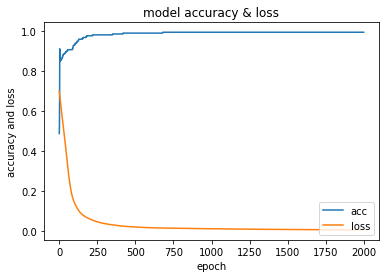

In [18]:
#Visualize the models accuracy and loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [19]:
#Print the shape of the training and testing data
print("-------------------------------------------------------------------")
print("Shape of training data: ", X_train.shape)
print("Shape of test data    : ", X_test.shape )
print("-------------------------------------------------------------------")


-------------------------------------------------------------------
Shape of training data:  (229, 6)
Shape of test data    :  (58, 6)
-------------------------------------------------------------------


In [20]:

#Loop through any and all saved models. Then get each models accuracy, loss, prediction and original values on the test data.
for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(X_test)
  pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
  scores = model.evaluate(X_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("-------------------------------------------------------------------")
  print()

Model file:  ckd.model
58/58 [==============================] - 0s 870us/step

Original  : 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0

Predicted : 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0

Scores    : loss =  0.266524797883527  acc =  0.982758641242981
-------------------------------------------------------------------

